<a href="https://colab.research.google.com/github/izamsaja/ECommerce_RFM_Cluster/blob/main/eCommerce%20Segmentation%20Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ASSIGNMENT BRIEF**

Gustavo just started an e-commerce startup based in Portugal that recently opened an online website to sell its product.  Fortunately, Gustavo is launching their website when the covid-19 hits and making them grow faster than ever. However, Gustavo is still not using targeted marketing which hurts their marketing budget as only a fraction of their user comes back to their website. 

Gustavo needs your help to increase their marketing conversion rate by doing more targeted marketing using customer segmentation so that it will not hurt their budget

Summary Report : [Click Here](https://docs.google.com/presentation/d/1lhIoZfaOmcpp8AML5b1_GJzE5iBYfTqf/edit?usp=sharing&ouid=108973547116953794207&rtpof=true&sd=true)

# IMPORT LIBRARY



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn import cluster

In [ ]:
sheet_url_1 = 'https://docs.google.com/spreadsheets/d/19dRR5wZGhY9KpADlDZvzKpGFjQqSXjZS4itdMCEOqQs/edit#gid=1001697892'
sheet_url_2 = 'https://docs.google.com/spreadsheets/d/1u59wXGhByhKx06P_acrCGqRyRgT_kHlH_esDpWkIO_g/edit#gid=1798916011'
sheet_url_3 = 'https://docs.google.com/spreadsheets/d/1NKiomvpvkPsCFKFIGldcUga7FQJxt1XyZ6qStspfrAs/edit#gid=1824440277'
orders = sheet_url_1.replace('/edit#gid=', '/export?format=csv&gid=')
customers_dataset = sheet_url_2.replace('/edit#gid=', '/export?format=csv&gid=')
order_payments_dataset = sheet_url_3.replace('/edit#gid=', '/export?format=csv&gid=')
df1 = pd.read_csv(orders)
df2 = pd.read_csv(customers_dataset)
df3 = pd.read_csv(order_payments_dataset)


In [ ]:
display(df1.info())
display(df2.info())
display(df3.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


None

In [ ]:
display(df1.head())
display(df2.head())
display(df3.head())

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 0:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 3:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 0:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 8:38:49,2018-08-08 8:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 0:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 0:28:42,2017-12-15 0:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 0:00:00


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


# CLEANING & MERGING TABLE

## Orders Table

In [ ]:
# Find number of null value
display(df1.isna().sum())
# No duplicated value in order_id columns
display(df1[df1[['order_id']].duplicated()])
# Find unique value of order_status
df1['order_status'].unique()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date


array(['delivered', 'invoiced', 'shipped', 'processing', 'unavailable',
       'canceled', 'created', 'approved'], dtype=object)

In [ ]:
# drop null rows, espesially for columns containing datetime 
df1_copy = df1.copy()
df1_copy.dropna(how='any', inplace=True)
display(df1_copy.info())
df1_copy['order_status'].unique() #<< only 'delivered' and 'canceled' status left

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96461 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       96461 non-null  object
 1   customer_id                    96461 non-null  object
 2   order_status                   96461 non-null  object
 3   order_purchase_timestamp       96461 non-null  object
 4   order_approved_at              96461 non-null  object
 5   order_delivered_carrier_date   96461 non-null  object
 6   order_delivered_customer_date  96461 non-null  object
 7   order_estimated_delivery_date  96461 non-null  object
dtypes: object(8)
memory usage: 6.6+ MB


None

array(['delivered', 'canceled'], dtype=object)

In [ ]:
# drop canceled rows
display(df1_copy[df1_copy['order_status'] == 'canceled']) #<< Found only 6 columns, we can remove it and focus to 'delivered' status
df1_copy.drop(df1_copy[df1_copy['order_status'] == 'canceled'].index, inplace=True)
df1_copy.reset_index()
df1_copy['order_status'].unique() #<< quick recheck

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
2921,1950d777989f6a877539f53795b4c3c3,1bccb206de9f0f25adc6871a1bcf77b2,canceled,2018-02-19 19:48:52,2018-02-19 20:56:05,2018-02-20 19:57:13,2018-03-21 22:03:51,2018-03-09 0:00:00
8791,dabf2b0e35b423f94618bf965fcb7514,5cdec0bb8cbdf53ffc8fdc212cd247c6,canceled,2016-10-09 0:56:52,2016-10-09 13:36:58,2016-10-13 13:36:59,2016-10-16 14:36:59,2016-11-30 0:00:00
58266,770d331c84e5b214bd9dc70a10b829d0,6c57e6119369185e575b36712766b0ef,canceled,2016-10-07 14:52:30,2016-10-07 15:07:10,2016-10-11 15:07:11,2016-10-14 15:07:11,2016-11-29 0:00:00
59332,8beb59392e21af5eb9547ae1a9938d06,bf609b5741f71697f65ce3852c5d2623,canceled,2016-10-08 20:17:50,2016-10-09 14:34:30,2016-10-14 22:45:26,2016-10-19 18:47:43,2016-11-30 0:00:00
92636,65d1e226dfaeb8cdc42f665422522d14,70fc57eeae292675927697fe03ad3ff5,canceled,2016-10-03 21:01:41,2016-10-04 10:18:57,2016-10-25 12:14:28,2016-11-08 10:58:34,2016-11-25 0:00:00
94399,2c45c33d2f9cb8ff8b1c86cc28c11c30,de4caa97afa80c8eeac2ff4c8da5b72e,canceled,2016-10-09 15:39:56,2016-10-10 10:40:49,2016-10-14 10:40:50,2016-11-09 14:53:50,2016-12-08 0:00:00


array(['delivered'], dtype=object)

In [ ]:
# convert to date_time format in specify column
date_cols = df1_copy.columns[3:8].to_list()
df1_copy[date_cols]= df1_copy[date_cols].apply(pd.to_datetime, format='%Y-%m-%d')
df1_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96455 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       96455 non-null  object        
 1   customer_id                    96455 non-null  object        
 2   order_status                   96455 non-null  object        
 3   order_purchase_timestamp       96455 non-null  datetime64[ns]
 4   order_approved_at              96455 non-null  datetime64[ns]
 5   order_delivered_carrier_date   96455 non-null  datetime64[ns]
 6   order_delivered_customer_date  96455 non-null  datetime64[ns]
 7   order_estimated_delivery_date  96455 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.6+ MB


In [ ]:
# make new columns contains delivering_time, diff_to_estimated, is_late, frequency and rencency
df1_copy['dow'] = df1_copy['order_purchase_timestamp'].dt.dayofweek
df1_copy['delivering_time'] =  df1_copy['order_delivered_customer_date']- df1_copy['order_delivered_carrier_date']
df1_copy['diff_to_estimated'] =  df1_copy['order_estimated_delivery_date']- df1_copy['order_delivered_customer_date']
df1_copy['is_late'] = df1_copy['order_delivered_customer_date'] > df1_copy['order_estimated_delivery_date']
df1_copy['delivering_time'] = df1_copy['delivering_time'].dt.days.astype('int')
df1_copy['diff_to_estimated'] = df1_copy['diff_to_estimated'].dt.days.astype('int')
df1_copy['recency'] = df1_copy['order_purchase_timestamp'].max() - df1_copy['order_purchase_timestamp']
df1_copy['recency'] = df1_copy['recency'].dt.days.astype('int64')
df1_copy.head()


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,dow,delivering_time,diff_to_estimated,is_late,recency
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,0,6,7,False,331
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1,12,5,False,35
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,2,9,17,False,21
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,5,9,12,False,283
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,1,1,9,False,196


In [ ]:
# order_delivered_customer_date	must be greater than order_delivered_carrier_date
# Fix negative delivering time to zero (sameday service)
df1_copy[df1_copy['delivering_time']< 0]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,dow,delivering_time,diff_to_estimated,is_late,recency
6437,a1abeb653a4d4cd1e142ccb8c82cd069,5f50465da00b7fed5dd1239f4ecf6e2c,delivered,2017-07-20 11:20:52,2017-07-21 06:43:14,2017-07-28 16:57:58,2017-07-25 19:32:56,2017-08-14,3,-3,19,False,405
9553,383aa8b2724fe452d9ccd9934a8c628b,b1cb2f9d7a19480f3749e248db14d58f,delivered,2017-07-02 20:58:43,2017-07-02 21:10:20,2017-07-07 17:22:41,2017-07-06 14:27:51,2017-07-21,6,-2,14,False,422
13487,cb1134f9010d242e9515ad1c78ec0c39,2fd33ac77677bd214b1882868317eeed,delivered,2017-07-16 12:35:34,2017-07-18 06:03:50,2017-07-20 19:22:02,2017-07-19 14:13:28,2017-08-08,6,-2,19,False,409
14474,dceb62e8fa94b46006c9554fed743df0,2721900eb4e0f1cc2c836dd7bc1b1e11,delivered,2017-07-20 20:58:05,2017-07-22 11:45:11,2017-08-01 18:23:30,2017-07-26 18:09:10,2017-08-11,3,-7,15,False,404
19268,5f9d46795c3126674e52becb3a1a517f,79287bcaafdde5c793b996fc40bb7d9f,delivered,2017-07-18 11:48:20,2017-07-18 12:03:29,2017-07-20 23:03:42,2017-07-20 18:52:41,2017-07-31,1,-1,10,False,407
21338,8c78d01de3a9009e23d6877a7cc9be20,6cd7106899e59a1fbd0622d5f1efedf4,delivered,2016-10-08 15:36:50,2016-10-08 18:13:44,2016-10-26 11:41:53,2016-10-25 17:51:46,2016-11-30,5,-1,35,False,689
22520,b27af682321527a6349f1761eb3f360c,9859dd92e872dbaa60ca3cd5f0d7ad07,delivered,2017-06-14 20:17:04,2017-06-14 20:30:08,2017-06-27 14:51:54,2017-06-26 15:45:35,2017-07-14,2,-1,17,False,440
25393,1cc3ae63caffff2d6c3ee3e78e074acf,01c843a2c0600def0b7693dba47af460,delivered,2017-08-07 21:35:22,2017-08-08 21:45:15,2017-08-10 18:28:56,2017-08-10 18:05:38,2017-08-25,0,-1,14,False,386
25646,e37f11cae9985ca58f0b56f268720537,3947a361301f2ff0f3223159a0f2701c,delivered,2017-07-26 11:46:34,2017-07-27 10:10:16,2017-08-01 18:17:47,2017-07-31 17:49:56,2017-08-24,2,-2,23,False,399
27470,fa3e37584f4fdb1ded0e0de700dfcb4e,63be4feff10a0b1d85f2cfbf10df9754,delivered,2017-07-30 19:32:23,2017-07-30 19:45:09,2017-08-09 18:18:43,2017-08-01 21:13:01,2017-08-18,6,-8,16,False,394


In [ ]:
df1_copy['delivering_time'][df1_copy['delivering_time']< 0] = 0
df1_copy.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,dow,delivering_time,diff_to_estimated,is_late,recency
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,0,6,7,False,331
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1,12,5,False,35
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,2,9,17,False,21
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,5,9,12,False,283
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,1,1,9,False,196


In [ ]:
# drop unnecessary columns 
df1_final = df1_copy.drop(columns=df1_copy.columns[4:8].tolist())
df1_final.info()
df1_final.head()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 96455 entries, 0 to 99440
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   order_id                  96455 non-null  object        
 1   customer_id               96455 non-null  object        
 2   order_status              96455 non-null  object        
 3   order_purchase_timestamp  96455 non-null  datetime64[ns]
 4   dow                       96455 non-null  int64         
 5   delivering_time           96455 non-null  int64         
 6   diff_to_estimated         96455 non-null  int64         
 7   is_late                   96455 non-null  bool          
 8   recency                   96455 non-null  int64         
dtypes: bool(1), datetime64[ns](1), int64(4), object(3)
memory usage: 6.7+ MB


,order_id,customer_id,order_status,order_purchase_timestamp,dow,delivering_time,diff_to_estimated,is_late,recency
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,0,6,7,False,331
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,1,12,5,False,35
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2,9,17,False,21
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,5,9,12,False,283
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,1,1,9,False,196


## Customers Table

In [ ]:
# Find number of null value, and no missing value detected
df2.isna().sum()
# Found 3345 duplicated values in customer_unique_id column, but we can't drop it
df2[df2[['customer_unique_id']].duplicated()] 

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
679,c57b4b6f3719475543b721e720a526ad,b6c083700ca8c135ba9f0f132930d4e8,8686,suzano,SP
1463,9f6f3da49e2d46e3a7529f5e3c25ecce,a40096fc0a3862e9e12bc55b5f8e6ab2,20561,rio de janeiro,RJ
1607,299f7b5125c8fbe1761a1b320c34fc7d,b8b3c435a58aebd788a477bed8342910,95585,arroio do sal,RS
2811,226d59f9f4b98e228b689eea45d03a6d,66980c3775537536f77b434d74e520f5,30290,belo horizonte,MG
3198,b1253701171dfb298f52a221f824e45b,788313d21c3507fe890921f6e17aa679,11070,santos,SP
...,...,...,...,...,...
99324,5b46a0d983eec8c97363bea78d4a69dd,8bab3162259edfaadd1ea2e1fe7f58dc,31565,belo horizonte,MG
99327,c1affa46f9f3b514555259049a0307b9,12ab9334b1240d6d037f2b0102a49571,38050,uberaba,MG
99336,ebf46ff530343a129926adc1f831dea4,0ee57f62666561b72f2ceacad0230cbf,9530,sao caetano do sul,SP
99353,282fbce48e4d2077aad602dd125c9225,0ceb502fc33a2ad327b08288c5310e2e,29134,viana,ES


In [ ]:
# Drop customer_zip_code_prefix(use city instead) and add frequency order by customer_unique_id 
df2_copy = df2.copy()
df2_copy.drop('customer_zip_code_prefix', axis=1, inplace=True)
df2_copy['freq'] = df2_copy.groupby('customer_unique_id').cumcount()+1 #<< assign number of purchases by counting customer_unique_id
df2_copy['freq'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17])

In [ ]:
df2_final = df2_copy
df2_final.info()
df2_final.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         99441 non-null  object
 1   customer_unique_id  99441 non-null  object
 2   customer_city       99441 non-null  object
 3   customer_state      99441 non-null  object
 4   freq                99441 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


,customer_id,customer_unique_id,customer_city,customer_state,freq
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,franca,SP,1
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,sao bernardo do campo,SP,1
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,sao paulo,SP,1
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,mogi das cruzes,SP,1
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,campinas,SP,1


## Order Payment Type

In [ ]:
# explore and find typos in payment type columns
df3_prep = df3.copy()
display(df3_prep['payment_type'].unique())
display(df3_prep[df3_prep['payment_type']=='not_defined']) #got 3 rows with not_defined payment_type
df3_prep.drop(df3_prep[df3_prep['payment_type']=='not_defined'].index, inplace=True) #<< drop 'not_defined' row
display(df3_prep['payment_type'].unique())

array(['credit_card', 'boleto', 'voucher', 'debit_card', 'not_defined'],
      dtype=object)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
51280,4637ca194b6387e2d538dc89b124b0ee,1,not_defined,1,0.0
57411,00b1cb0320190ca0daa2c88b35206009,1,not_defined,1,0.0
94427,c8c528189310eaa44a745b8d9d26908b,1,not_defined,1,0.0


array(['credit_card', 'boleto', 'voucher', 'debit_card'], dtype=object)

In [ ]:
# create new columns containing payment type encoding
df3_prep['payment_type'] = df3_prep['payment_type'].astype('category')
df3_prep['payment_type_enc'] = df3_prep['payment_type'].cat.codes

df3_prep.info() #<< found duplicate in order_id columns


<class 'pandas.core.frame.DataFrame'>
Int64Index: 103883 entries, 0 to 103885
Data columns (total 6 columns):
 #   Column                Non-Null Count   Dtype   
---  ------                --------------   -----   
 0   order_id              103883 non-null  object  
 1   payment_sequential    103883 non-null  int64   
 2   payment_type          103883 non-null  category
 3   payment_installments  103883 non-null  int64   
 4   payment_value         103883 non-null  float64 
 5   payment_type_enc      103883 non-null  int8    
dtypes: category(1), float64(1), int64(2), int8(1), object(1)
memory usage: 4.2+ MB


In [ ]:
# Handling duplicate data using groupby method
df3_grouped= df3_prep.groupby('order_id').agg({'payment_sequential':'max','payment_type':'last', 'payment_type_enc':'last', 'payment_installments':'sum', 'payment_value':'sum'})
df3_copy = df3_grouped.reset_index()
display(df3_copy.head())
df3_copy.info()

,order_id,payment_sequential,payment_type,payment_type_enc,payment_installments,payment_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,credit_card,1,2,72.19
1,00018f77f2f0320c557190d7a144bdd3,1,credit_card,1,3,259.83
2,000229ec398224ef6ca0657da4fc703e,1,credit_card,1,5,216.87
3,00024acbcdf0a6daa1e931b038114c75,1,credit_card,1,2,25.78
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,credit_card,1,3,218.04


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99437 entries, 0 to 99436
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   order_id              99437 non-null  object  
 1   payment_sequential    99437 non-null  int64   
 2   payment_type          99437 non-null  category
 3   payment_type_enc      99437 non-null  int8    
 4   payment_installments  99437 non-null  int64   
 5   payment_value         99437 non-null  float64 
dtypes: category(1), float64(1), int64(2), int8(1), object(1)
memory usage: 3.2+ MB


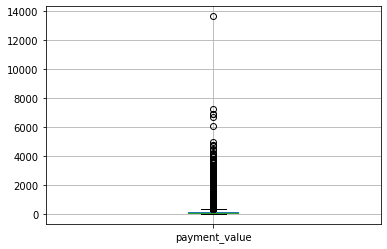

In [ ]:
#detecting outliers using 'payment_value' variable
df3_copy.boxplot('payment_value')
plt.show()

In [ ]:
# Setting Boxplot
Q1 = df3_copy['payment_value'].quantile(0.25)
Q3 = df3_copy['payment_value'].quantile(0.75)

IQR = Q3 - Q1
boxplot_min = Q1 - 1.5 * IQR
boxplot_max = Q3 + 1.5 * IQR
print('Q1:\n',Q1)
print('\nQ3:\n',Q3)
print('\nIQR:\n',IQR)
print('\nMin:\n',boxplot_min)
print('\nMax:\n',boxplot_max)

Q1:
 62.01

Q3:
 176.97

IQR:
 114.96000000000001

Min:
 -110.43

Max:
 349.40999999999997


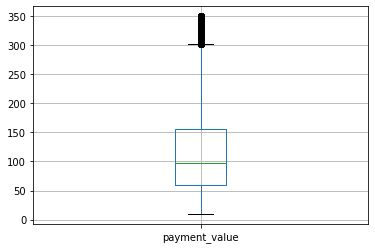

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91571 entries, 0 to 99436
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   order_id              91571 non-null  object  
 1   payment_sequential    91571 non-null  int64   
 2   payment_type          91571 non-null  category
 3   payment_type_enc      91571 non-null  int8    
 4   payment_installments  91571 non-null  int64   
 5   payment_value         91571 non-null  float64 
dtypes: category(1), float64(1), int64(2), int8(1), object(1)
memory usage: 3.7+ MB


,order_id,payment_sequential,payment_type,payment_type_enc,payment_installments,payment_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,credit_card,1,2,72.19
1,00018f77f2f0320c557190d7a144bdd3,1,credit_card,1,3,259.83
2,000229ec398224ef6ca0657da4fc703e,1,credit_card,1,5,216.87
3,00024acbcdf0a6daa1e931b038114c75,1,credit_card,1,2,25.78
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,credit_card,1,3,218.04


In [ ]:
#Removing Outliers using boxplot method
filter_outlier_min = df3_copy['payment_value'] < boxplot_min
filter_outlier_max = df3_copy['payment_value'] > boxplot_max

df3_non_outlier = df3_copy[~(filter_outlier_max | filter_outlier_min)]
df3_non_outlier.boxplot(column='payment_value')
plt.show()
df3_final = df3_non_outlier
df3_final.info()
df3_final.head()

In [ ]:
# Outlier Percentage
df_outlier = df3_copy[(filter_outlier_max | filter_outlier_min)].count()
print(df_outlier['payment_value']/df3_non_outlier['payment_value'].count()*100) 
#<< we shouldn't remove it, but in this case we were instructed to

8.590055803693309


## **Table Merge**

In [ ]:
# Merge each final df tables
df_fix = df1_final.merge(df2_final, how='left', on='customer_id').merge(df3_final, how='left', on='order_id')
df_fix.info()
df_fix.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96455 entries, 0 to 96454
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   order_id                  96455 non-null  object        
 1   customer_id               96455 non-null  object        
 2   order_status              96455 non-null  object        
 3   order_purchase_timestamp  96455 non-null  datetime64[ns]
 4   dow                       96455 non-null  int64         
 5   delivering_time           96455 non-null  int64         
 6   diff_to_estimated         96455 non-null  int64         
 7   is_late                   96455 non-null  bool          
 8   recency                   96455 non-null  int64         
 9   customer_unique_id        96455 non-null  object        
 10  customer_city             96455 non-null  object        
 11  customer_state            96455 non-null  object        
 12  freq              

,order_id,customer_id,order_status,order_purchase_timestamp,dow,delivering_time,diff_to_estimated,is_late,recency,customer_unique_id,customer_city,customer_state,freq,payment_sequential,payment_type,payment_type_enc,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,0,6,7,False,331,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,1,3.0,voucher,3.0,3.0,38.71
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,1,12,5,False,35,af07308b275d755c9edb36a90c618231,barreiras,BA,1,1.0,boleto,0.0,1.0,141.46
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2,9,17,False,21,3a653a41f6f9fc3d2a113cf8398680e8,vianopolis,GO,1,1.0,credit_card,1.0,3.0,179.12
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,5,9,12,False,283,7c142cf63193a1473d2e66489a9ae977,sao goncalo do amarante,RN,1,1.0,credit_card,1.0,1.0,72.20
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,1,1,9,False,196,72632f0f9dd73dfee390c9b22eb56dd6,santo andre,SP,1,1.0,credit_card,1.0,1.0,28.62


# **EDA**

## **Insight 1**
From the descriptive table and Histogram Graph, we can provide some insight :

*   There are null values ​​in some columns due to joining three tables using left join
*   Average delivering_time is **~9 days**
*   diff_to_estimated is the difference between the estimated delivered time and the actual given time, which is **~11 days faster** on average.
*   Customers who make repeated orders have the most order history, up to **16 orders**.
*   On average, customers make **~3 instalments** on payment per order.
*   The average value per order is **~115 dollars**

In [ ]:
# Run Descriptive Statistics to get insight
df_fix.describe()

,dow,delivering_time,diff_to_estimated,recency,freq,payment_sequential,payment_type_enc,payment_installments,payment_value
count,96455.000000,96455.000000,96455.000000,96455.000000,96455.000000,88931.000000,88931.000000,88931.000000,88931.000000
mean,2.756218,8.879042,10.874584,239.081883,1.039065,1.044889,0.872485,2.752426,115.178871
std,1.967044,8.745169,10.181726,152.797749,0.249718,0.367290,0.564814,2.499140,72.349233
min,0.000000,0.000000,-189.000000,0.000000,1.000000,1.000000,0.000000,0.000000,9.590000
25%,1.000000,4.000000,6.000000,115.000000,1.000000,1.000000,1.000000,1.000000,58.630000
50%,3.000000,7.000000,11.000000,220.000000,1.000000,1.000000,1.000000,2.000000,97.170000
75%,4.000000,12.000000,16.000000,349.000000,1.000000,1.000000,1.000000,4.000000,155.630000
max,6.000000,205.000000,146.000000,713.000000,16.000000,26.000000,3.000000,26.000000,349.400000


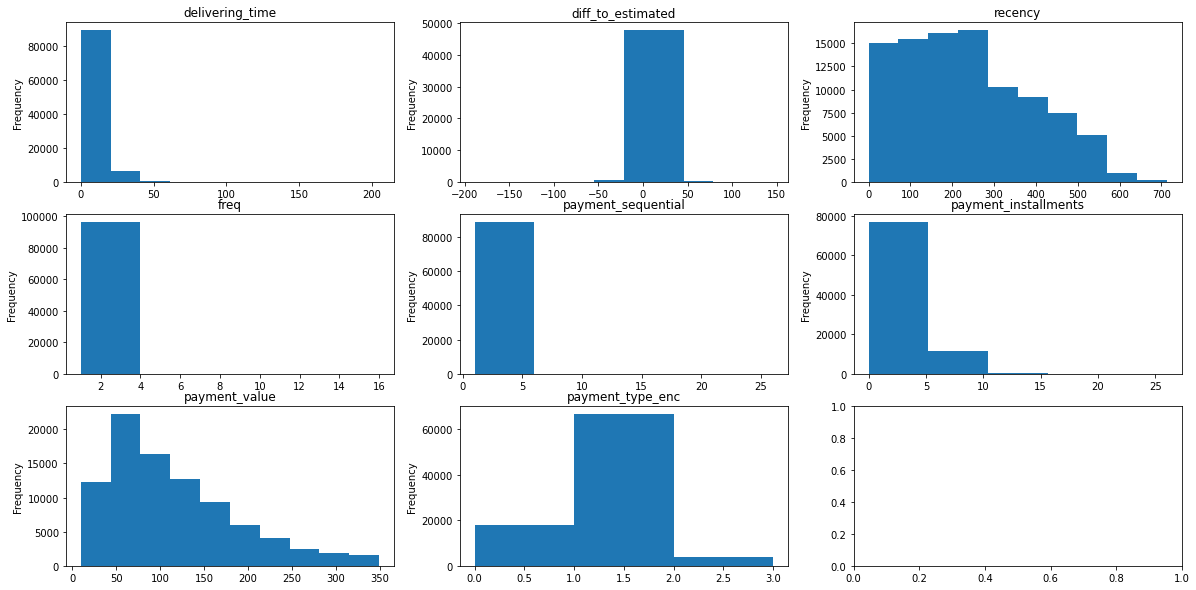

In [ ]:
cols = ['delivering_time','diff_to_estimated','recency','freq','payment_sequential','payment_installments','payment_value','payment_type_enc']
nbins = [10, 10, 10, 5, 5, 5, 10, 3]
fig, axes = plt.subplots(nrows=3, ncols=3,figsize=(20,10))
for i,el in enumerate(cols):
    df_fix[el].plot(kind='hist', ax=axes.flatten()[i],grid=False, title=el, bins=nbins[i])

## **Insight 2**

*   People intend to buy products on a **weekday** instead of a weekend
*   Relatively, **Monday** is the busiest day, with almost 16.000 orders in this period
*   SP states code for **Sao Paulo** generates 42% from total orders and almost 40% in sales



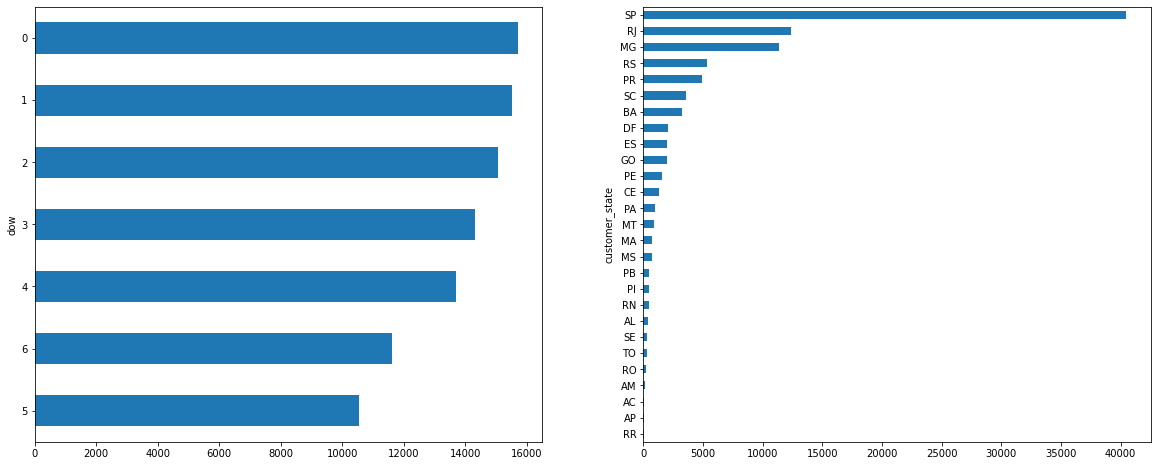

In [ ]:
# Which Day is the bussiest? Which state with generates the largest orders come?
cols = ['dow','customer_state']
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(20,8))
for i,el in enumerate(cols):
    df_fix[el].value_counts().sort_values(ascending=True).plot\
    (kind='barh', ax=axes.flatten()[i],grid=False, xlabel=el)

In [ ]:
state_group = df_fix.groupby('customer_state')['order_id', 'payment_value']\
                    .agg({'order_id':'count', 'payment_value':'sum'}).sort_values(by='order_id',ascending=False)
display(state_group.head())
print('SP on Total Orders',state_group.loc['SP','order_id']/state_group['order_id'].sum())
print('SP on Total Sales',state_group.loc['SP','payment_value']/state_group['payment_value'].sum())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,order_id,payment_value
customer_state,,
SP,40488,4052553.53
RJ,12348,1368685.27
MG,11351,1238834.22
RS,5342,584424.06
PR,4923,515479.27


SP on Total Orders 0.4197605100824219
SP on Total Sales 0.39564234470077414


## **Insight 3**


*   **8%** of all orders delivering **is late**, SP contributes most of it, and somehow it correlates with the number of orders
*   75% of payment orders are from **credit card**s. Fun fact : *Online payments in Brazil are dominated by Credit Cards and Boleto Bancário, accounting for more than 93% of all online purchases in Brazil.* **So it's a match!**

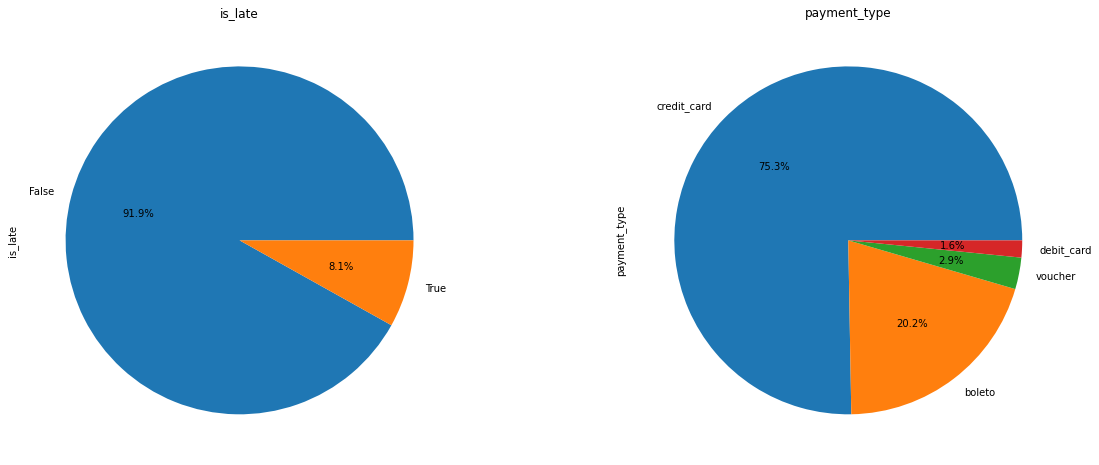

In [ ]:
# Get the percentage of late delivering and favorite payment_type
cols = ['is_late', 'payment_type']
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(20,8))
for i,el in enumerate(cols):
    df_fix[el].value_counts().plot(kind='pie', ax=axes.flatten()[i],grid=False, title=el, autopct='%1.1f%%')

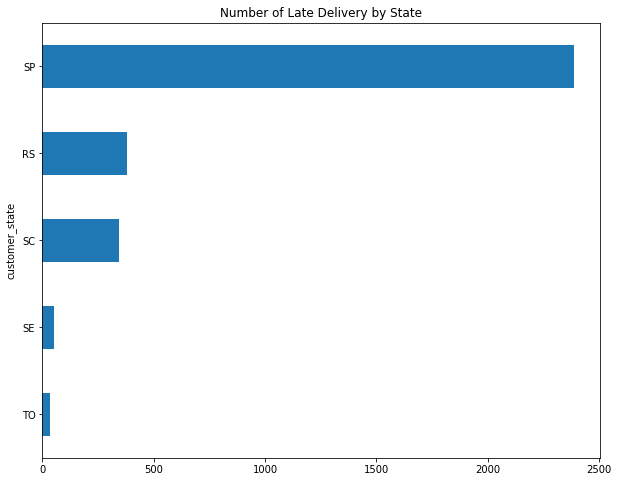

In [ ]:
state_most_late = df_fix.groupby(['customer_state']).apply(lambda x: x[x['is_late'] == True]['customer_state'].count())

state_most_late.tail(5).sort_values(ascending=True).plot(kind='barh', figsize=(10,8))
plt.title('Number of Late Delivery by State')
plt.show()

## **Insight 4**

*   The number of orders has an **upward** trend monthly and yearly, increasing over time.



In [ ]:
# Find Numbers of Orders per Month per Year
df_fix['year'] = df_fix['order_purchase_timestamp'].dt.year
df_fix['month'] = df_fix['order_purchase_timestamp'].dt.month
order_per_month_pivot = pd.pivot_table(df_fix, values='order_id', index=['month'],columns=['year'], aggfunc='count')
order_per_month_pivot


year,2016,2017,2018
month,,,
1,NaN,748.0,7069.0
2,NaN,1641.0,6555.0
3,NaN,2546.0,7003.0
4,NaN,2303.0,6798.0
5,NaN,3545.0,6749.0
6,NaN,3135.0,6096.0
7,NaN,3872.0,6156.0
8,NaN,4193.0,6351.0
9,1.0,4149.0,NaN


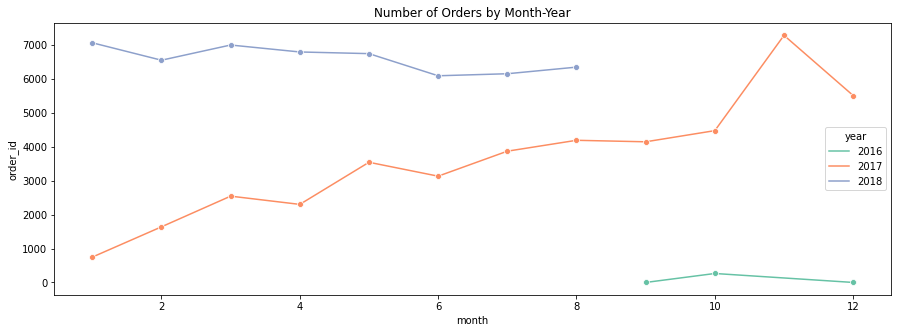

In [ ]:
# Plotting to time series graph, Monthly Number of Orders
order_per_month_index = df_fix.groupby(['year', 'month'])['order_id'].agg('count')
order_per_month = order_per_month_index.reset_index(level=['year', 'month'] )
fig = plt.figure(figsize=(15,5))

ax = fig.add_subplot(1, 1, 1)
ax.set_title('Number of Orders by Month-Year')
sns.lineplot(data=order_per_month,x='month',y='order_id',ax=ax,hue='year',palette='Set2', marker='o')

plt.show()

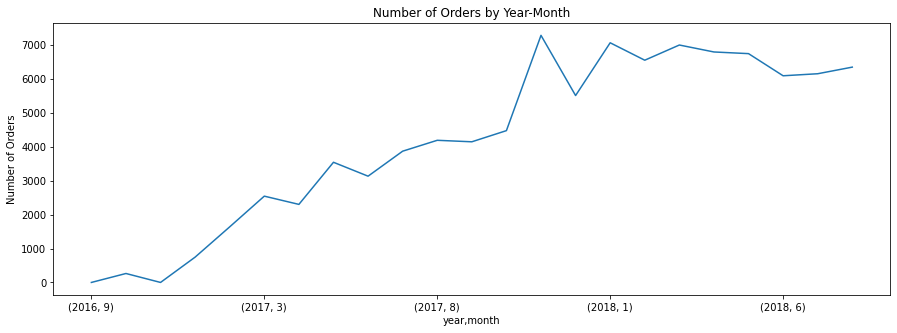

In [ ]:
#plotting to make a timeseries trend in one chart
order_per_month_index.plot(x='year', y='count', kind='line', figsize=(15,5), ylabel='Number of Orders')
plt.title('Number of Orders by Year-Month')
plt.show()

## **Insight 5**

*   **Only 3%** of customers who **buy products more than one time** in two years, most of them are the one-time purchaser. It's quite low, so Gustavo should launch some customer loyalty program so they will be retained and buy more products



,customer_unique_id
freq,
1,93240
>1,3215


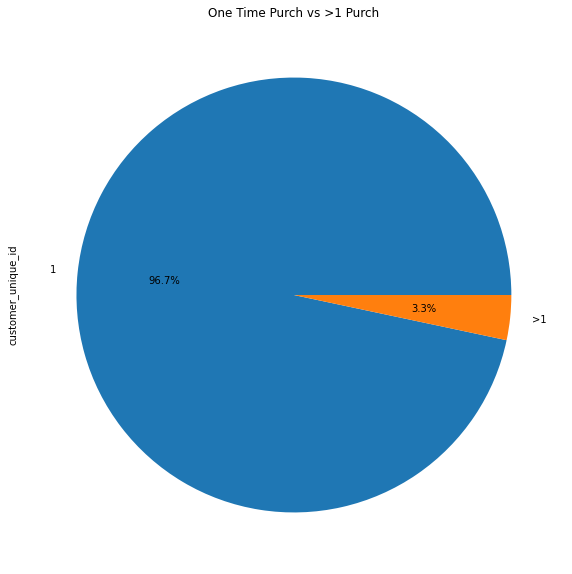

In [ ]:
# Get number of customer who order more than one time
cust_freq = df_fix.groupby('freq')['customer_unique_id'].count()
cust_ret = cust_freq.reset_index()
cust_ret_1 = cust_ret.iloc[:1,0:]
cust_ret_2 = pd.DataFrame(cust_ret.iloc[1:15,0:].sum()).transpose()
cust_ret_sum = cust_ret_1.append(cust_ret_2, ignore_index=True)
cust_ret_sum['freq'] = cust_ret_sum['freq'].astype('string')
cust_ret_sum.at[1,'freq'] = '>1'
cust_ret_sum = cust_ret_sum.set_index('freq')
display(cust_ret_sum)
cust_ret_sum['customer_unique_id'].plot(kind='pie', autopct='%1.1f%%', figsize=(10,10))
plt.title('One Time Purch vs >1 Purch')
plt.show()

# **CLUSTER ANALYSIS**

In [ ]:
# Selecting numerical column, we're using RFM Columns
df_num_col = df_fix[['customer_unique_id','recency','freq','payment_value']]
display(df_num_col)
# Group by 'customer_unique_id'
dfg = df_num_col.groupby('customer_unique_id').agg({'recency':'min', 'freq':'max', 'payment_value':'sum'})
dfg

,customer_unique_id,recency,freq,payment_value
0,7c396fd4830fd04220f754e42b4e5bff,331,1,38.71
1,af07308b275d755c9edb36a90c618231,35,1,141.46
2,3a653a41f6f9fc3d2a113cf8398680e8,21,1,179.12
3,7c142cf63193a1473d2e66489a9ae977,283,1,72.20
4,72632f0f9dd73dfee390c9b22eb56dd6,196,1,28.62
...,...,...,...,...
96450,6359f309b166b0196dbf7ad2ac62bb5a,538,1,85.08
96451,da62f9e57a76d978d02ab5362c509660,204,1,195.00
96452,737520a9aad80b3fbbdad19b66b37b30,367,1,271.01
96453,5097a5312c8b157bb7be58ae360ef43c,232,1,NaN


,recency,freq,payment_value
customer_unique_id,,,
0000366f3b9a7992bf8c76cfdf3221e2,111,1,141.90
0000b849f77a49e4a4ce2b2a4ca5be3f,114,1,27.19
0000f46a3911fa3c0805444483337064,536,1,86.22
0000f6ccb0745a6a4b88665a16c9f078,320,1,43.62
0004aac84e0df4da2b147fca70cf8255,287,1,196.89
...,...,...,...
fffcf5a5ff07b0908bd4e2dbc735a684,446,1,0.00
fffea47cd6d3cc0a88bd621562a9d061,261,1,84.58
ffff371b4d645b6ecea244b27531430a,567,1,112.46


In [ ]:
# Using scalar
colnum = dfg.columns.to_list()
scaler = MinMaxScaler()
dfg[colnum] = scaler.fit_transform(dfg[colnum])
dfg.head()

,recency,freq,payment_value
customer_unique_id,,,
0000366f3b9a7992bf8c76cfdf3221e2,0.155680,0.0,0.126389
0000b849f77a49e4a4ce2b2a4ca5be3f,0.159888,0.0,0.024218
0000f46a3911fa3c0805444483337064,0.751753,0.0,0.076796
0000f6ccb0745a6a4b88665a16c9f078,0.448808,0.0,0.038852
0004aac84e0df4da2b147fca70cf8255,0.402525,0.0,0.175369


## K-Means Elbow Method

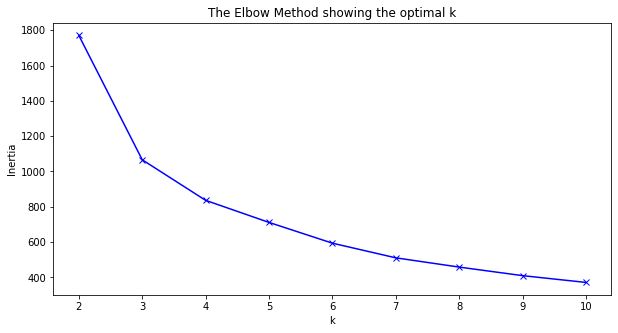

In [ ]:
distortions = []
K = range(2,11)
for k in K:
    kmeanModel = cluster.KMeans(n_clusters=k)
    kmeanModel.fit(dfg)
    distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(10,5))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('The Elbow Method showing the optimal k')
plt.show()

## Import Silhoutte Function

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
def silhoutte_analysis(data,cluster=[2,3,4]):
    X = data.to_numpy()

    range_n_clusters = cluster

    for n_clusters in range_n_clusters:
        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 7)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all
        # lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator
        # seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters=n_clusters, random_state=10)
        cluster_labels = clusterer.fit_predict(X)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        silhouette_avg = silhouette_score(X, cluster_labels)
        print(
            "For n_clusters =",
            n_clusters,
            "The average silhouette_score is :",
            silhouette_avg,
        )

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(
                np.arange(y_lower, y_upper),
                0,
                ith_cluster_silhouette_values,
                facecolor=color,
                edgecolor=color,
                alpha=0.7,
            )

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(
            X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
        )

        # Labeling the clusters
        centers = clusterer.cluster_centers_
        # Draw white circles at cluster centers
        ax2.scatter(
            centers[:, 0],
            centers[:, 1],
            marker="o",
            c="white",
            alpha=1,
            s=200,
            edgecolor="k",
        )

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(
            "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
            % n_clusters,
            fontsize=14,
            fontweight="bold",
        )

    plt.show()

## Validating K Using Silhoutte

For n_clusters = 2 The average silhouette_score is : 0.5168680513352909
For n_clusters = 3 The average silhouette_score is : 0.44913115215937505
For n_clusters = 4 The average silhouette_score is : 0.3825725754446806
For n_clusters = 5 The average silhouette_score is : 0.38906316731043844


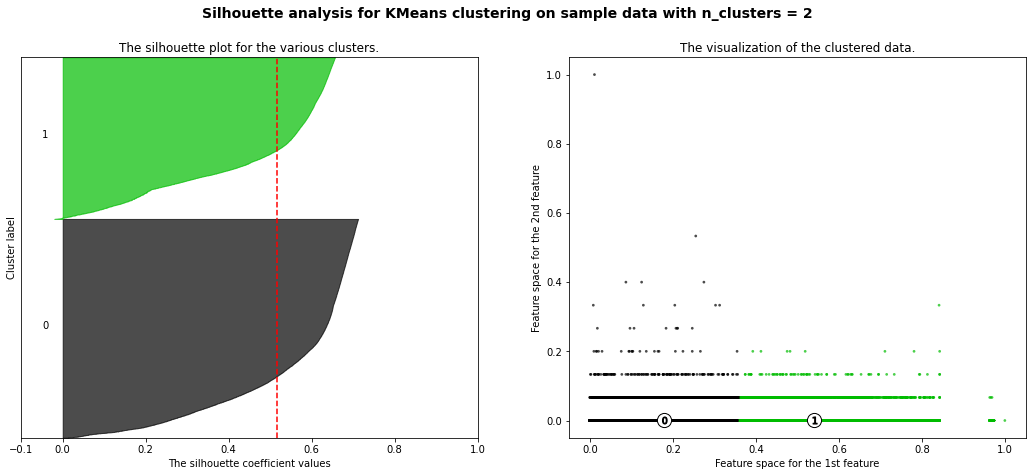

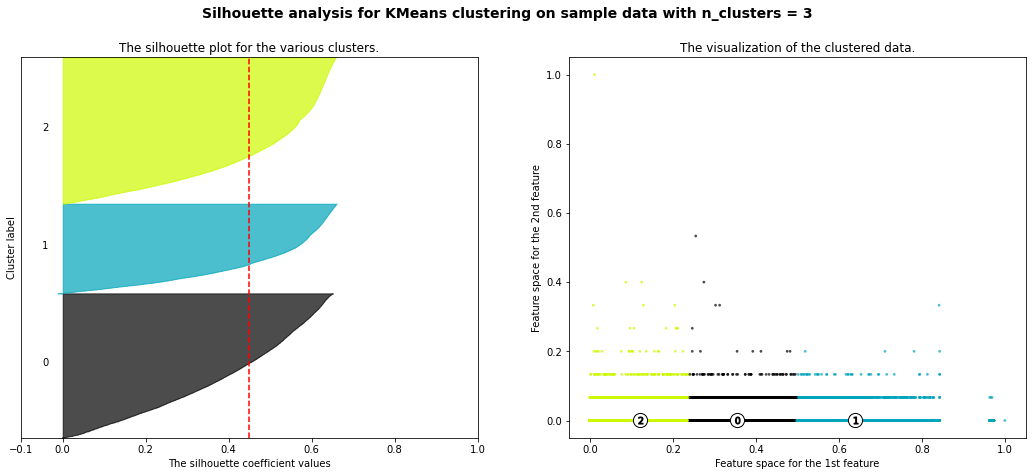

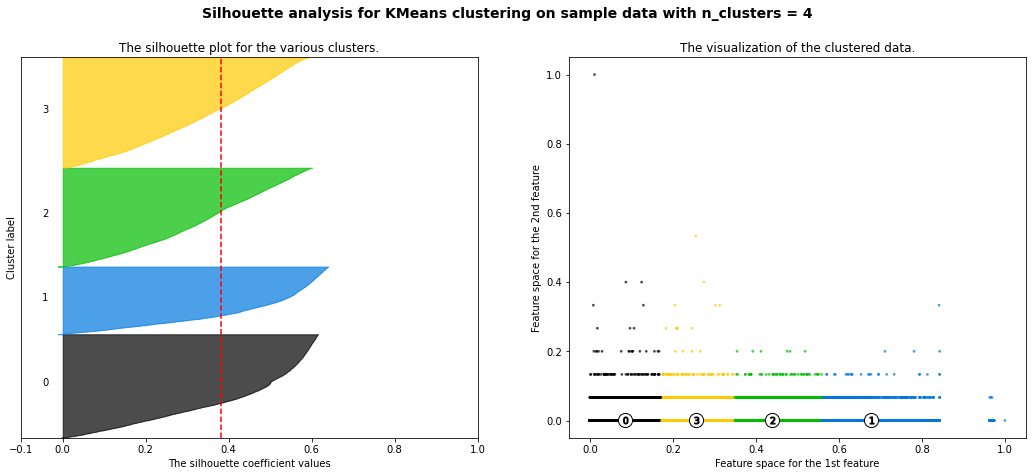

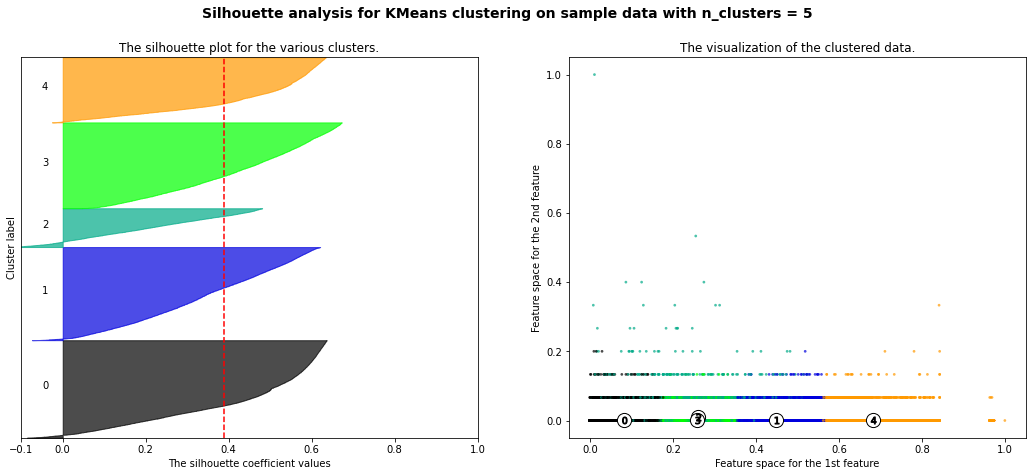

In [ ]:
silhoutte_analysis(dfg,list(range(2,6)))

In [ ]:
# Assigninng new column containing cluster number
cluster_model = cluster.KMeans(n_clusters=3)
cluster_model.fit(dfg)
cluster_label = cluster_model.labels_
dfg['cluster'] = cluster_label
dfg_fix = dfg.reset_index()
dfg_fix

,customer_unique_id,recency,freq,payment_value,cluster
0,0000366f3b9a7992bf8c76cfdf3221e2,0.155680,0.0,0.126389,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,0.159888,0.0,0.024218,1
2,0000f46a3911fa3c0805444483337064,0.751753,0.0,0.076796,2
3,0000f6ccb0745a6a4b88665a16c9f078,0.448808,0.0,0.038852,0
4,0004aac84e0df4da2b147fca70cf8255,0.402525,0.0,0.175369,0
...,...,...,...,...,...
93331,fffcf5a5ff07b0908bd4e2dbc735a684,0.625526,0.0,0.000000,2
93332,fffea47cd6d3cc0a88bd621562a9d061,0.366059,0.0,0.075335,0
93333,ffff371b4d645b6ecea244b27531430a,0.795231,0.0,0.100167,2
93334,ffff5962728ec6157033ef9805bacc48,0.165498,0.0,0.119077,1


In [ ]:
# We were grouping df1 by Customer ID so we merge it again to get cluster column in original dataset
df_merge = pd.merge(df_fix,dfg_fix[['customer_unique_id','cluster']],on='customer_unique_id', how='left')
df_merge.head()

,order_id,customer_id,order_status,order_purchase_timestamp,dow,delivering_time,diff_to_estimated,is_late,recency,customer_unique_id,...,customer_state,freq,payment_sequential,payment_type,payment_type_enc,payment_installments,payment_value,year,month,cluster
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,0,6,7,False,331,7c396fd4830fd04220f754e42b4e5bff,...,SP,1,3.0,voucher,3.0,3.0,38.71,2017,10,0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,1,12,5,False,35,af07308b275d755c9edb36a90c618231,...,BA,1,1.0,boleto,0.0,1.0,141.46,2018,7,1
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2,9,17,False,21,3a653a41f6f9fc3d2a113cf8398680e8,...,GO,1,1.0,credit_card,1.0,3.0,179.12,2018,8,1
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,5,9,12,False,283,7c142cf63193a1473d2e66489a9ae977,...,RN,1,1.0,credit_card,1.0,1.0,72.20,2017,11,0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,1,1,9,False,196,72632f0f9dd73dfee390c9b22eb56dd6,...,SP,1,1.0,credit_card,1.0,1.0,28.62,2018,2,0


In [ ]:
df_merge.groupby(['cluster'])['recency','freq','payment_value','payment_installments']\
        .agg({'mean', 'sum', 'count'})

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


recency                         freq                  payment_value  \
          count       sum        mean  count    sum      mean         count   
cluster                                                                       
0         36467   9352123  256.454411  36467  37843  1.037733         33734   
1         37493   3425325   91.359054  37493  39221  1.046089         34516   
2         22495  10283195  457.132474  22495  23159  1.029518         20681   

                                payment_installments                     
                sum        mean                count      sum      mean  
cluster                                                                  
0        3887350.46  115.235384                33734  91874.0  2.723484  
1        4025421.76  116.624805                34516  90745.0  2.629071  
2        2330199.96  112.673466                20681  62157.0  3.005512

## Clustering Summary

By using the Elbow Method to find the most optimal k value, this analysis produces **3 clusters**. The number of clusters is validated by Silhouette Analysis which then produces different k value.

After trying to use k values ​​with values ​​2 and 3, we will use k-values ​​with values ​​3. Because there are essential differences in these 3 clusters, which will be explained below.

The input for this analysis uses three variables: **recency**, which is generated from the date of the customer's last order; **frequency**, which is obtained from the number of orders per customer; **payment_value**, which is a representation of Customer Lifetime Value (CLV).

These three clusters have the following characteristics.


1. Cluster 0 >> **Old Customer, High spender with higher CLV**
2. Cluster 1 >> **New Customer, High spender with higher CLV**
3. Cluster 2 >> **Older Customer, Low spender with lower CLV**

The **most significant** difference between the three clusters is the categorization of customers based on order time / **recency**. So the right treatment is not scaling but retention. Gustavo must provide **treatment to 97% of customers who are one-time purchasers** to buy again in this eCommerce.

# RFM ANALYSIS FOR MARKETING SEGMENTATION

## Import RFM Function

In [ ]:
!pip install pandasql

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# RFM Analysis
# source: https://www.putler.com/rfm-analysis/

from pandasql import sqldf
pysqldfX = lambda q,ctx: sqldf(q, ctx)

In [ ]:
import pandas as pd

class RFM():
  def __init__(self, 
        id_colname:str = 'id', 
        recency_colname:str = 'recency', 
        frequency_colname:str = 'frequency', 
        monetary_colname:str = 'monetary',
        num_cluster:int = 5
    ):
    self.id_colname = id_colname;
    self.recency_colname = recency_colname;
    self.frequency_colname = frequency_colname;
    self.monetary_colname = monetary_colname;
    self.num_cluster = num_cluster;
    #------------------------------------------
    self.dict_rfm_reference = {
      "Champions":{
        "Segment":"Champions",
        "Activity":"Bought recently, buy often and spend the most!",
        "Actionable":"Reward them. Can be early adopters for new products. Will promote your brand."
      },
      "Loyal Customers":{
        "Segment":"Loyal Customers",
        "Activity":"Spend good money with us often. Responsive to promotions.",
        "Actionable":"Upsell higher value products. Ask for reviews. Engage them."
      },
      "Potential Loyalist":{
        "Segment":"Potential Loyalist",
        "Activity":"Recent customers, but spent a good amount and bought more than once.",
        "Actionable":"Offer membership / loyalty program, recommend other products."
      },
      "Recent Customers":{
        "Segment":"Recent Customers",
        "Activity":"Bought most recently, but not often.",
        "Actionable":"Provide on-boarding support, give them early success, start building relationship."
      },
      "Promising":{
        "Segment":"Promising",
        "Activity":"Recent shoppers, but haven’t spent much.",
        "Actionable":"Create brand awareness, offer free trials"
      },
      "Customers Needing Attention":{
        "Segment":"Customers Needing Attention",
        "Activity":"Above average recency, frequency and monetary values. May not have bought very recently though.",
        "Actionable":"Make limited time offers, Recommend based on past purchases. Reactivate them."
      },
      "About To Sleep":{
        "Segment":"About To Sleep",
        "Activity":"Below average recency, frequency and monetary values. Will lose them if not reactivated.",
        "Actionable":"Share valuable resources, recommend popular products / renewals at discount, reconnect with them."
      },
      "At Risk":{
        "Segment":"At Risk",
        "Activity":"Spent big money and purchased often. But long time ago. Need to bring them back!",
        "Actionable":"Send personalized emails to reconnect, offer renewals, provide helpful resources."
      },
      "Can’t Lose Them":{
        "Segment":"Can’t Lose Them",
        "Activity":"Made biggest purchases, and often. But haven’t returned for a long time.",
        "Actionable":"Win them back via renewals or newer products, don’t lose them to competition, talk to them."
      },
      "Hibernating":{
        "Segment":"Hibernating",
        "Activity":"Last purchase was long back, low spenders and low number of orders.",
        "Actionable":"Offer other relevant products and special discounts. Recreate brand value."
      },
      "Lost":{
        "Segment":"Lost",
        "Activity":"Lowest recency, frequency and monetary scores.",
        "Actionable":"Revive interest with reach out campaign, ignore otherwise."
      }
    };

    _segments = {
      "Champions":[555, 554, 544, 545, 454, 455, 445],
      "Loyal Customers":[543, 444, 435, 355, 354, 345, 344, 335],
      "Potential Loyalist":[553, 551,552, 541, 542, 533, 532, 531, 452, 451, 442, 441, 431, 453, 433, 432, 423, 353, 352, 351, 342, 341, 333, 323],
      "Recent Customers":[512, 511, 422, 421, 412, 411, 311],
      "Promising":[525, 524, 523, 522, 521, 515, 514, 513, 425, 424, 413,414, 415, 315, 314, 313],
      "Customers Needing Attention":[535, 534, 443, 434, 343, 334, 325, 324],
      "About To Sleep":[331, 321, 312, 221, 213],
      "At Risk":[255, 254, 245, 244, 253, 252, 243, 242, 235, 234, 225, 224, 153, 152, 145, 143, 142, 135, 134, 133, 125, 124],
      "Can’t Lose Them":[155, 154, 144, 214,215,115, 114, 113],
      "Hibernating":[332, 322, 231, 241, 251, 233, 232, 223, 222, 132, 123, 122, 212, 211],
      "Lost":[111, 112, 121, 131,141,151]
    }

    self.df_rfm_segmentation = {};
    for _segment in _segments.keys():
      for _rfm_score in _segments[_segment]:
        self.df_rfm_segmentation[str(_rfm_score)] = self.dict_rfm_reference[_segment];

    #------------------------------------------
    self.df_recency_model = None;
    self.df_frequency_model = None;
    self.df_monetary_model = None;
  
  def __get_rfm_dataset_query__(self)->str:
    return f"""
      select 
        "{self.id_colname}" as id, 
        "{self.recency_colname}" as recency,
        "{self.frequency_colname}" as frequency,
        "{self.monetary_colname}" as monetary 
      from df
    """;

  def extract_dataset(self,df_x):
    #step 0: extract the dataset
    str_query = self.__get_rfm_dataset_query__();
    df_rfm_dataset = pysqldfX(str_query,{"df":df_x});
    return df_rfm_dataset;

  def get_feature_clusters(self, df_rfm_dataset) -> pd.DataFrame:
    df_rfm_dataset['recency_score'] = pd.qcut(
        x=df_rfm_dataset['recency'].rank(method='first').values,
        q=self.num_cluster, labels = False
    )+1;
    df_rfm_dataset['frequency_score'] = pd.qcut(
        x=df_rfm_dataset['frequency'].rank(method='first').values,
        q=self.num_cluster, labels = False
    )+1;
    df_rfm_dataset['monetary_score'] = pd.qcut(
        x=df_rfm_dataset['monetary'].rank(method='first').values,
        q=self.num_cluster, labels = False 
    )+1;
    self.df_recency_model = pysqldfX("""
      select 'recency' as label, recency_score as score, min(recency) as min, max(recency) as max 
      from df group by recency_score order by recency_score asc
    """,{"df":df_rfm_dataset});
    self.df_frequency_model = pysqldfX("""
      select 'frequency' as label, frequency_score as score, min(frequency) as min, max(frequency) as max 
      from df group by frequency_score order by frequency_score asc
    """,{"df":df_rfm_dataset});
    self.df_monetary_model = pysqldfX("""
      select 'monetary' as label, monetary_score as score, min(monetary) as min, max(monetary) as max 
      from df group by monetary_score order by monetary_score asc
    """,{"df":df_rfm_dataset});

  def generate_sql_model(self, df_x):
    label = df_x['label'].unique()[0];
    _cache = [];
    row_counts = df_x.shape[0];
    for i in range(0, row_counts):
      if(i+1<row_counts):
        _cache.append(f"""when {label} <= {df_x['max'][i]} then {df_x['score'][i]}""");
      else:
        _cache.append(f"""when {label} > {df_x['max'][i-1]} then {df_x['score'][i]}""");
    _str = "\n".join(_cache);
    return f"""(case {_str} end) as {label}_score""";

  def score(self, df_x) -> pd.DataFrame:
    #step 0: extract the dataset
    df_rfm_dataset = self.extract_dataset(df_x);

    str_query = f"""
      with tmp as (
        select df.*,
          {self.generate_sql_model(self.df_recency_model)},
          {self.generate_sql_model(self.df_frequency_model)},
          {self.generate_sql_model(self.df_monetary_model)}
        from df
      )
      select tmp.*, (recency_score||frequency_score||monetary_score) as rfm_score
      from tmp
    """;
    return pysqldfX(str_query,{"df":df_rfm_dataset});

  def label_samples(self, df_rfm_feature_scored) -> pd.DataFrame:
    label_ref = [];
    for i in range(0,df_rfm_feature_scored.shape[0]):
      label_ref.append(
          self.df_rfm_segmentation[str(df_rfm_feature_scored['rfm_score'][i])]
      );
    return pd.concat([df_rfm_feature_scored, pd.DataFrame(label_ref)],axis=1);

  def fit(self, df_x):
    #step 0: extract the dataset
    df_rfm_dataset = self.extract_dataset(df_x);

    #step 1: divide each RFM feature into n buckets
    df_rfm_dataset = self.get_feature_clusters(df_rfm_dataset);

  def transform(self, df_x) -> pd.DataFrame:
    #step 2: score each feature based on model
    df_rfm_feature_scored = self.score(df_x);

    #step 3: map each row with their reference table
    df_rfm_feature_labeled = self.label_samples(df_rfm_feature_scored);

    return df_rfm_feature_labeled;

  def fit_transform(self, df_x: pd.DataFrame) -> pd.DataFrame :
    self.fit(df_x);
    return self.transform(df_x);

## Result

In [ ]:
# Selecting numerical column
df_num_cols = df_fix[['customer_unique_id','recency','freq','payment_value']]
# Group by 'customer_unique_id'
dfg_rfm = df_num_cols.groupby('customer_unique_id').agg({'recency':'min', 'freq':'max', 'payment_value':'sum' }).reset_index()
dfg_rfm.info()
dfg_rfm.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93336 entries, 0 to 93335
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   customer_unique_id  93336 non-null  object 
 1   recency             93336 non-null  int64  
 2   freq                93336 non-null  int64  
 3   payment_value       93336 non-null  float64
dtypes: float64(1), int64(2), object(1)
memory usage: 2.8+ MB


,customer_unique_id,recency,freq,payment_value
0,0000366f3b9a7992bf8c76cfdf3221e2,111,1,141.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,114,1,27.19
2,0000f46a3911fa3c0805444483337064,536,1,86.22
3,0000f6ccb0745a6a4b88665a16c9f078,320,1,43.62
4,0004aac84e0df4da2b147fca70cf8255,287,1,196.89


In [ ]:
rfm = RFM(
    id_colname ='customer_unique_id',
    recency_colname = 'recency', 
    frequency_colname = 'freq', 
    monetary_colname = 'payment_value'
);
rfm.fit(dfg_rfm);

In [ ]:
rfm.df_recency_model

,label,score,min,max
0,recency,1,0,91
1,recency,2,91,176
2,recency,3,176,267
3,recency,4,267,381
4,recency,5,381,713


In [ ]:
rfm.df_frequency_model

,label,score,min,max
0,frequency,1,1,1
1,frequency,2,1,1
2,frequency,3,1,1
3,frequency,4,1,1
4,frequency,5,1,16


In [ ]:
rfm.df_monetary_model

,label,score,min,max
0,monetary,1,0.00,43.62
1,monetary,2,43.63,73.34
2,monetary,3,73.34,113.11
3,monetary,4,113.11,169.99
4,monetary,5,169.99,1122.72


In [ ]:
rfm.score(dfg_rfm)

,id,recency,frequency,monetary,recency_score,frequency_score,monetary_score,rfm_score
0,0000366f3b9a7992bf8c76cfdf3221e2,111,1,141.90,2,1,4,214
1,0000b849f77a49e4a4ce2b2a4ca5be3f,114,1,27.19,2,1,1,211
2,0000f46a3911fa3c0805444483337064,536,1,86.22,5,1,3,513
3,0000f6ccb0745a6a4b88665a16c9f078,320,1,43.62,4,1,1,411
4,0004aac84e0df4da2b147fca70cf8255,287,1,196.89,4,1,5,415
...,...,...,...,...,...,...,...,...
93331,fffcf5a5ff07b0908bd4e2dbc735a684,446,1,0.00,5,1,1,511
93332,fffea47cd6d3cc0a88bd621562a9d061,261,1,84.58,3,1,3,313
93333,ffff371b4d645b6ecea244b27531430a,567,1,112.46,5,1,3,513
93334,ffff5962728ec6157033ef9805bacc48,118,1,133.69,2,1,4,214


In [ ]:
# Inspect Segmentation categories
df_rfm = rfm.transform(dfg_rfm)
display(df_rfm['Segment'].value_counts())
df_rfm.head()

Promising             31726
Recent Customers      18805
Can’t Lose Them       18486
About To Sleep         7358
Lost                   7329
Hibernating            7314
Champions               791
At Risk                 674
Loyal Customers         501
Potential Loyalist      352
Name: Segment, dtype: int64

,id,recency,frequency,monetary,recency_score,frequency_score,monetary_score,rfm_score,Segment,Activity,Actionable
0,0000366f3b9a7992bf8c76cfdf3221e2,111,1,141.90,2,1,4,214,Can’t Lose Them,"Made biggest purchases, and often. But haven’t...","Win them back via renewals or newer products, ..."
1,0000b849f77a49e4a4ce2b2a4ca5be3f,114,1,27.19,2,1,1,211,Hibernating,"Last purchase was long back, low spenders and ...",Offer other relevant products and special disc...
2,0000f46a3911fa3c0805444483337064,536,1,86.22,5,1,3,513,Promising,"Recent shoppers, but haven’t spent much.","Create brand awareness, offer free trials"
3,0000f6ccb0745a6a4b88665a16c9f078,320,1,43.62,4,1,1,411,Recent Customers,"Bought most recently, but not often.","Provide on-boarding support, give them early s..."
4,0004aac84e0df4da2b147fca70cf8255,287,1,196.89,4,1,5,415,Promising,"Recent shoppers, but haven’t spent much.","Create brand awareness, offer free trials"


In [ ]:
rfm.transform(dfg_rfm)

,id,recency,frequency,monetary,recency_score,frequency_score,monetary_score,rfm_score,Segment,Activity,Actionable
0,0000366f3b9a7992bf8c76cfdf3221e2,111,1,141.90,2,1,4,214,Can’t Lose Them,"Made biggest purchases, and often. But haven’t...","Win them back via renewals or newer products, ..."
1,0000b849f77a49e4a4ce2b2a4ca5be3f,114,1,27.19,2,1,1,211,Hibernating,"Last purchase was long back, low spenders and ...",Offer other relevant products and special disc...
2,0000f46a3911fa3c0805444483337064,536,1,86.22,5,1,3,513,Promising,"Recent shoppers, but haven’t spent much.","Create brand awareness, offer free trials"
3,0000f6ccb0745a6a4b88665a16c9f078,320,1,43.62,4,1,1,411,Recent Customers,"Bought most recently, but not often.","Provide on-boarding support, give them early s..."
4,0004aac84e0df4da2b147fca70cf8255,287,1,196.89,4,1,5,415,Promising,"Recent shoppers, but haven’t spent much.","Create brand awareness, offer free trials"
...,...,...,...,...,...,...,...,...,...,...,...
93331,fffcf5a5ff07b0908bd4e2dbc735a684,446,1,0.00,5,1,1,511,Recent Customers,"Bought most recently, but not often.","Provide on-boarding support, give them early s..."
93332,fffea47cd6d3cc0a88bd621562a9d061,261,1,84.58,3,1,3,313,Promising,"Recent shoppers, but haven’t spent much.","Create brand awareness, offer free trials"
93333,ffff371b4d645b6ecea244b27531430a,567,1,112.46,5,1,3,513,Promising,"Recent shoppers, but haven’t spent much.","Create brand awareness, offer free trials"
93334,ffff5962728ec6157033ef9805bacc48,118,1,133.69,2,1,4,214,Can’t Lose Them,"Made biggest purchases, and often. But haven’t...","Win them back via renewals or newer products, ..."


,sum
Segment,
Promising,4822465.42
Can’t Lose Them,3113590.30
Recent Customers,683022.44
About To Sleep,555399.33
Hibernating,286735.49
Lost,284399.24
Champions,196793.96
At Risk,146038.46
Loyal Customers,129140.74


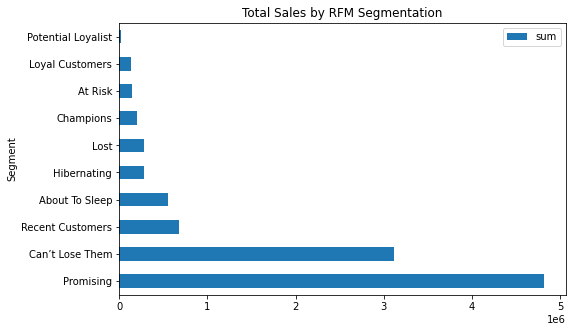

In [ ]:
# Plotting to get insight
df_rfm_group = df_rfm.groupby('Segment')['monetary'].agg(['sum']).sort_values(by='sum', ascending=False)
display(df_rfm_group)
df_rfm_group.plot(kind='barh', title='Total Sales by RFM Segmentation', figsize=(8,5))
plt.show()


In [ ]:
print("Segment : Promising\n | Activity :Recent shoppers, but haven’t spent much.\n | Actionable : Create brand awareness, offer free trials")
print("Segment Can’t Lose Them\n | Activity Made biggest purchases, and often. But haven’t returned for a long time\n | Actionable Win them back via renewals or newer products, don’t lose them to competition, talk to them.")

Segment : Promising
 | Activity :Recent shoppers, but haven’t spent much.
 | Actionable : Create brand awareness, offer free trials
Segment Can’t Lose Them
 | Activity Made biggest purchases, and often. But haven’t returned for a long time
 | Actionable Win them back via renewals or newer products, don’t lose them to competition, talk to them.


## **RFM Segmentation Summary**

Based on the chart above, 11 segmentations are clustered by the RFM function. These 11 segmentations result from the three input variables described in Cluster Analysis, namely Recency, Frequency, and Monetary. The segmentation that Gustavo should pay attention to is:


1. Promising
> Characteristics: Recent buyers but haven't spent a lot of money.
    Treatment: Create brand awareness, offer a free trial

2. Can't Lose Them
> Characteristics: Make the biggest purchases, and often. But haven't been back for a long time
    Treatment: Win them back through updates or newer products, don't lose out on the competition, and talk to them.

Gustavo should focus on the two segments above because they contribute almost 80% of sales, the treatment recommendations : again, it's all about to retain customers.